In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from DENCLUE import DENCLUE
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('breast-cancer-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.102429,-0.193580,0.118569,0.091908,0.146442,0.306571,0.247690,0.236449,0.207042,0.210612,...,0.176154,-0.126913,0.215080,0.186849,0.122094,0.244309,0.196959,0.214377,0.256816,0.180853
1,0.356555,-0.068908,0.328522,0.371927,-0.161140,-0.094910,-0.004647,0.106810,0.000271,-0.169264,...,0.351899,-0.071942,0.299132,0.368377,-0.073191,-0.083876,-0.028595,0.211827,-0.047524,0.054792
2,0.258207,0.074556,0.256019,0.254774,0.153989,0.172083,0.222838,0.332952,0.153576,-0.065048,...,0.247090,-0.003918,0.220223,0.238006,0.086196,0.176987,0.139731,0.319513,0.188317,0.032914
3,-0.054977,0.018142,-0.042377,-0.054659,0.234774,0.243308,0.136986,0.103797,0.205017,0.351130,...,-0.020125,0.009580,-0.017871,-0.039326,0.242690,0.278377,0.142255,0.155568,0.432291,0.352853
4,0.298304,-0.196304,0.302782,0.311245,0.047784,0.091920,0.233662,0.243458,-0.001629,-0.095859,...,0.221317,-0.249982,0.228128,0.208048,0.037589,-0.053412,0.104504,0.124288,-0.147994,-0.067678


In [5]:
data_array = df_normalized.values
data_list = data_array.tolist()
X = data_list
x = data_array 

In [6]:
X = df_normalized.values  # Convert DataFrame to numpy array

# Instantiate and fit the DENCLUE model
denclue = DENCLUE(h = 0.32, eps = 1e-8, min_density = 1.0)
denclue.fit(X)

DENCLUE(h=0.32, min_density=1.0)

In [7]:
labels = denclue.labels_

print(set(labels))
print(labels)

{0.0, 1.0}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 

In [8]:
# Calculate metrics
ch_index = calinski_harabasz_score(data_list, labels)
silhouette_avg = silhouette_score(x, labels)
db_index = davies_bouldin_score(x, labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.309425937376127
Calinski Harabasz Score: 276.4618224295942
Davies Bouldin Index: 1.3462780175152018


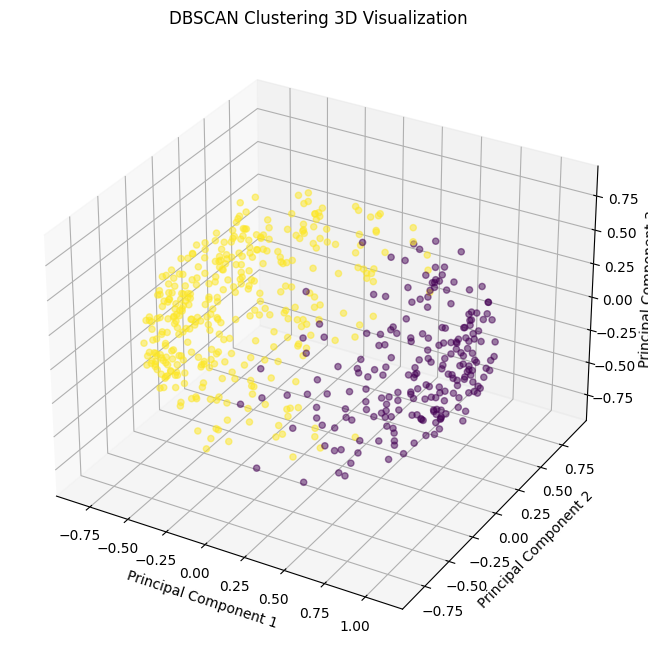

In [9]:
visualization(x, labels)

In [10]:
interactive_visualization(x, labels)